# Boston and Portland Detailed Analysis

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
from IPython.display import clear_output
from matplotlib.ticker import FuncFormatter
import numpy as np

## Functions

In [2]:
def bostonBikeData():
    # PURPOSE: Creates a single dataframe holding only the Boston bike data of interest 
    # ARGUMENTS: None
    # RETURNS: Dataframe holding bike data
    
    #Location of raw data
    fileDir = '../data/BikeData/' + 'Boston' +'/'

    #Lists to hold output data
    cityList = []
    tripDuration = []
    startTime = []
    endTime = []
    tripList = []
    yearList = []
    monthList = []
    weekList =[]
    dayList = []
    weekdayList = []
    
    #Read in all csvs and save start/end times
    for each_csv in os.listdir(fileDir):
        print(each_csv)
        raw_df = pd.read_csv(fileDir + each_csv)
        raw_df = raw_df.fillna('0')
        startTime.extend(raw_df['starttime'].tolist())
        endTime.extend(raw_df['stoptime'].tolist())
    
    #Parse start/end dates
    for i in range(len(startTime)):
        try:
            startFormatted = datetime.strptime(startTime[i], "%Y-%m-%d %H:%M:%S")
            endFormatted = datetime.strptime(endTime[i], "%Y-%m-%d %H:%M:%S")
        except Exception:
            try:
                startFormatted = datetime.strptime(startTime[i], "%Y-%m-%d %H:%M:%S.%f")
                endFormatted = datetime.strptime(endTime[i], "%Y-%m-%d %H:%M:%S.%f")
            except:
                print(f'Time formatting Error at {startTime[i]}')
    
        #Populate parsed data
        yearList.append(startFormatted.year)
        monthList.append(startFormatted.month)
        weekList.append(startFormatted.isocalendar()[1])
        dayList.append(startFormatted.day)
        
        #Get weekend or weekday
        if startFormatted.weekday() > 4:
            weekdayList.append('N')
        else:
            weekdayList.append('Y')

        #Trip duration
        time_delta = (endFormatted - startFormatted)
        total_seconds = time_delta.total_seconds()
        tripDuration.append(total_seconds)
        
        #Remaining data
        cityList.append('Boston')
        tripList.append(1)
        
    #Write data 
    data = {'City':cityList,
            'TripStart':startTime,
            'TripEnd':endTime,
            'Year':yearList,
            'Month':monthList,
            'Week':weekList,
            'Day':dayList,
            'Duration(sec)':tripDuration,
            'Weekday':weekdayList,
            'NumTrips':tripList}
    
    df_data = pd.DataFrame(data)
     
    #df_data.columns=['City','Year','Week','Average Duration (sec)','Number Trips']
    
    clear_output(wait=False)
    return df_data
        

In [3]:
def portlandBikeData():
    # PURPOSE: Creates a single dataframe holding only the Portland bike data of interest 
    # ARGUMENTS: None
    # RETURNS: Dataframe holding bike data
    
    #Location of raw data
    fileDir = '../data/BikeData/' + 'Portland' +'/'

    #Lists to hold output data
    cityList = []
    tripDuration = []
    startTime = []
    startDate = []
    endTime = []
    endDate = []
    tripList = []
    yearList = []
    monthList = []
    weekList =[]
    dayList = []
    weekdayList = []
    
    #Read in all csvs and save start/end times
    for each_csv in os.listdir(fileDir):
        print(each_csv)
        raw_df = pd.read_csv(fileDir + each_csv)
        raw_df = raw_df.fillna('0')
        startDate.extend(raw_df['StartDate'].tolist())
        startTime.extend(raw_df['StartTime'].tolist())
        endDate.extend(raw_df['EndDate'].tolist())
        endTime.extend(raw_df['EndTime'].tolist())
    
    #Combine date and time values into one 
    startTimeFull = []
    endTimeFull = []
    for i in range(len(startDate)):
        startTimeFull.append(startDate[i] + ' ' + startTime[i])
        endTimeFull.append(endDate[i] + ' ' + endTime[i])

    #To account for skipped data
    startTimeFullAdjusted = []
    endTimeFullAdjusted = []
        
    #Parse start/end dates
    for i in range(len(startTimeFull)):
        if ((startTimeFull[i] == '0 0') or (endTimeFull[i] == '0 0')):
            continue
        else:
            try:
                startFormatted = datetime.strptime(startTimeFull[i], "%m/%d/%Y %H:%M")
                endFormatted = datetime.strptime(endTimeFull[i], "%m/%d/%Y %H:%M")
            except Exception:
                print(f'Time formatting Error at {startTimeFull[i]}')
        
            #Populate parsed data
            yearList.append(startFormatted.year)
            monthList.append(startFormatted.month)
            weekList.append(startFormatted.isocalendar()[1])
            dayList.append(startFormatted.day)
            
            #Get weekend or weekday
            if startFormatted.weekday() > 4:
                weekdayList.append('N')
            else:
                weekdayList.append('Y')
    
            #Trip duration
            time_delta = (endFormatted - startFormatted)
            total_seconds = time_delta.total_seconds()
            tripDuration.append(total_seconds)
            
            #Remaining data
            cityList.append('Portland')
            tripList.append(1)
            
            #To account for skipped data
            startTimeFullAdjusted.append(startTimeFull[i])
            endTimeFullAdjusted.append(endTimeFull[i])
    
    #Write data 
    data = {'City':cityList,
            'TripStart':startTimeFullAdjusted,
            'TripEnd':endTimeFullAdjusted,
            'Year':yearList,
            'Month':monthList,
            'Week':weekList,
            'Day':dayList,
            'Duration(sec)':tripDuration,
            'Weekday':weekdayList,
            'NumTrips':tripList}
    
    df_data = pd.DataFrame(data)
     
    #df_data.columns=['City','Year','Week','Average Duration (sec)','Number Trips']
    
    clear_output(wait=False)
    return df_data
    

In [4]:
def getWeatherData(city):
    # PURPOSE: Creates a single dataframe holding weather data
    # ARGUMENTS: City to collect data from 
    # RETURNS: Dataframe holding bike data
    
    #Location of raw data
    fileDir = '../data/WeatherData/' + city +'.csv'
    
    #Read in data
    raw_df = pd.read_csv(fileDir)
    raw_df = raw_df.fillna(999999)
    
    #Replace missing values 
    precip = raw_df['Precip(in)'].replace({'T':None})
    raw_df['Precip(in)'] = precip
    raw_df = raw_df.drop(columns=['Snow(in)'])
    
    #Parse dates
    yearList = []
    monthList = []
    dayList = []
    cityList = []
    dateList = raw_df['Date'].tolist()
    for date in dateList:
        try:
            dateParsed = datetime.strptime(date, "%Y-%m-%d")
        except Exception:
            print(f'Time formatting Error at {date}')
        yearList.append(dateParsed.year)
        monthList.append(dateParsed.month)
        dayList.append(dateParsed.day)
        cityList.append(city)
    
    #Format weather date 
    highTempList = raw_df['High(F)'].tolist()
    lowTempList = raw_df['Low(F)'].tolist()
    precipationList = raw_df['Precip(in)'].tolist()
    avgTempList = []
    for i in range(len(highTempList)):
        highTempList[i] = round((highTempList[i]-32)*(5/9),3)
        lowTempList[i] = round((lowTempList[i]-32)*(5/9),3)
        avgTempList.append(round((highTempList[i] + lowTempList[i])/2,3))
        if precipationList[i] == None:
            continue
        else:
            precipationList[i] = round(float(precipationList[i])*2.54,3)
        
    
    #Assemble in dataframe 
    data = {'City':cityList,
            'Year':yearList,
            'Month':monthList,
            'Day':dayList,
            'High(C)':highTempList,
            'Avg(C)':avgTempList,
            'Low(C)':lowTempList,
            'Precipitation(cm)':precipationList}
    df = pd.DataFrame(data)
    
    return(df)


In [129]:
def plotCityData(df):
    # PURPOSE: Plots avergae ride time and number of trips 
    # ARGUMENTS: df to plot 
    # RETURNS: none
    
    #Get City
    city = df['City'].iloc[0]
    
    # set up x axis to plot 
    dateList = []
    yearList = df['Year'].tolist()
    weekList = df['Week'].tolist()
    for i in range(len(yearList)):
        dateItem = datetime.fromisocalendar(yearList[i],weekList[i],1)
        dateList.append((dateItem))
    df['Date'] = dateList
    df = df.set_index('Date')
    
    #split the dataframes up for plotting seperatly 
    df_rides = df.drop(columns=['City','Year','Week','Number Trips'])
    df_duration = df.drop(columns=['City','Year','Week','Average Duration (sec)'])
    
    pt_rides = pd.pivot_table(df_rides, index=df.index.isocalendar().week, columns=df.index.year)
    pt_rides.columns = pt_rides.columns.droplevel() 
    pt_duration = pd.pivot_table(df_duration, index=df.index.isocalendar().week, columns=df.index.year)
    pt_duration.columns = pt_duration.columns.droplevel() 
    
    pt_rides = pt_rides[pt_rides.columns[::-1]]
    pt_duration = pt_duration[pt_duration.columns[::-1]]
    
    fig, ax = plt.subplots(2)
    ax[0].plot(pt_rides)
    ax[1].plot(pt_duration)
    ax[0].legend(pt_rides.columns.tolist(), loc='center left', bbox_to_anchor=(1,.5), prop={'size': 16})
    ax[1].legend(pt_duration.columns.tolist(), loc='center left', bbox_to_anchor=(1,.5), prop={'size': 16})
    ax[0].set_title(f'{city} Number Rides', fontsize = 24)
    ax[1].set_title(f'{city} Ride Duration', fontsize = 24)
    ax[0].set(xlabel='Week of Year', ylabel='Number Rides')
    ax[1].set(xlabel='Week of Year', ylabel='Duration (sec)')
    
    fig.set_size_inches(18, 18)

    plt.show()

## Compile Data

In [6]:
df_bostonBike = bostonBikeData()
df_bostonWeather = getWeatherData('Boston')
df_boston = df_bostonBike.merge(df_bostonWeather,on=['City','Year','Month','Day'])

In [7]:
df_portlandBike = portlandBikeData()
df_portlandWeather = getWeatherData('Portland')
df_portland = df_portlandBike.merge(df_portlandWeather,on=['City','Year','Month','Day'])

## Filter and Aggregate

In [17]:
maxYear = 2019
months = [6,7,8]
maxPrecipitation = 0.5 #cm
Weekday = 'Y' 
minDuration = 300 #sec
maxDuration = 10000 #sec

In [29]:
df_boston_Filtered = df_boston.loc[(df_boston['Year'] <= maxYear) & 
                                   (df_boston['Month'].isin(months)) & 
                                   (df_boston['Precipitation(cm)'] < maxPrecipitation) & 
                                   (df_boston['Weekday'] == 'Y') &
                                   (df_boston['Duration(sec)'] > minDuration) & 
                                   (df_boston['Duration(sec)'] < maxDuration)]

df_boston_Fianl = df_boston_Filtered.groupby(['City','Year', 'Week']).agg({'Duration(sec)':['mean'],'NumTrips':['sum']}) 
df_boston_Fianl = df_boston_Fianl.reset_index()
df_boston_Fianl.columns=['City','Year','Week','Average Duration (sec)','Number Trips']

df_portland_Filtered = df_portland.loc[(df_portland['Month'].isin(months)) & 
                                   (df_portland['Precipitation(cm)'] < maxPrecipitation) & 
                                   (df_portland['Weekday'] == 'Y') &
                                   (df_portland['Duration(sec)'] > minDuration) & 
                                   (df_portland['Duration(sec)'] < maxDuration)]

df_portland_Fianl = df_portland_Filtered.groupby(['City','Year','Week']).agg({'Duration(sec)':['mean'],'NumTrips':['sum']}) 
df_portland_Fianl = df_portland_Fianl.reset_index()
df_portland_Fianl.columns=['City','Year','Week','Average Duration (sec)','Number Trips']


## Visualize 

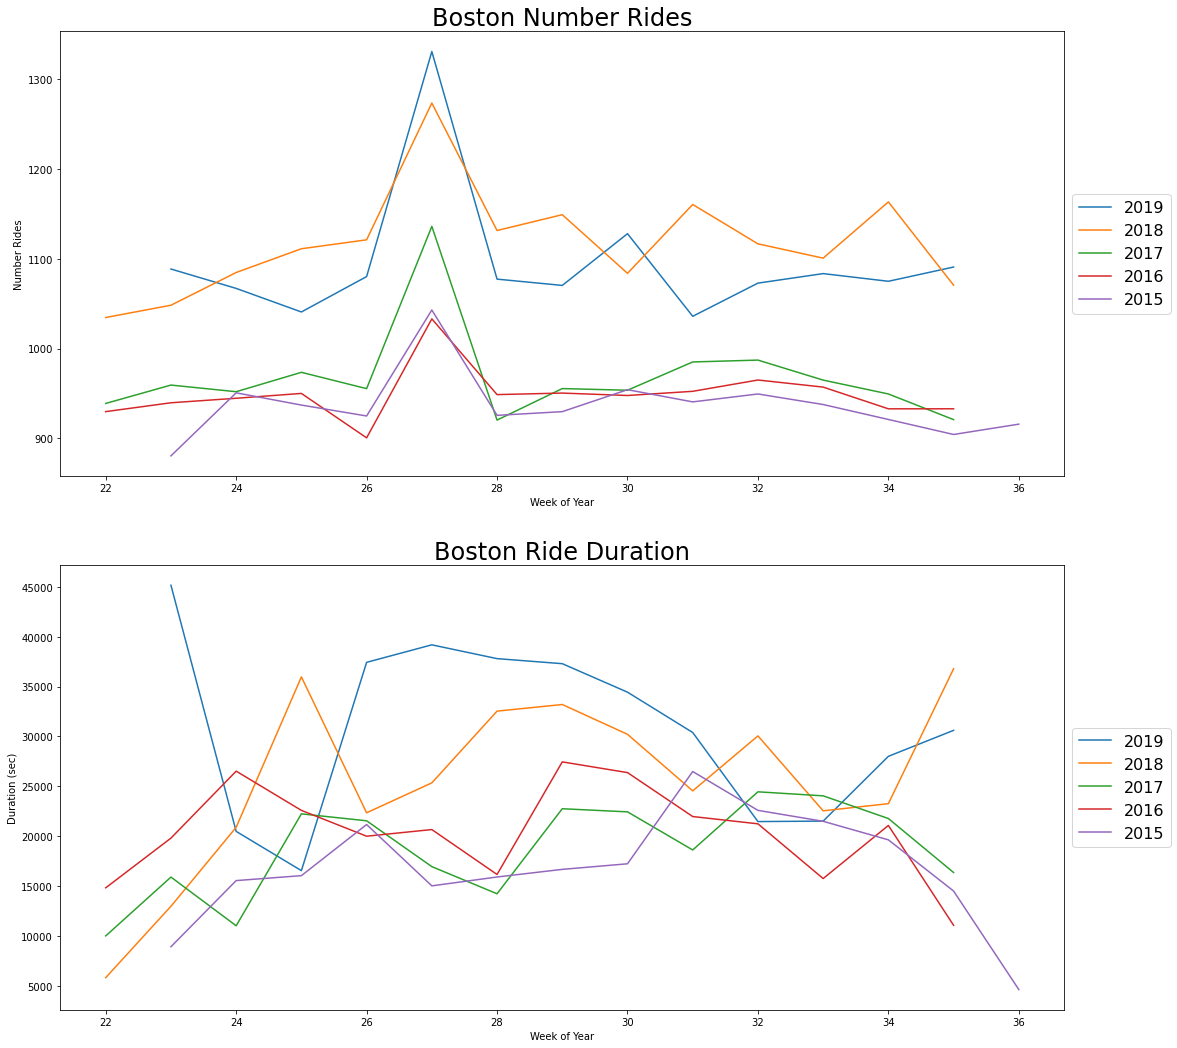

In [130]:
plotCityData(df_boston_Fianl)

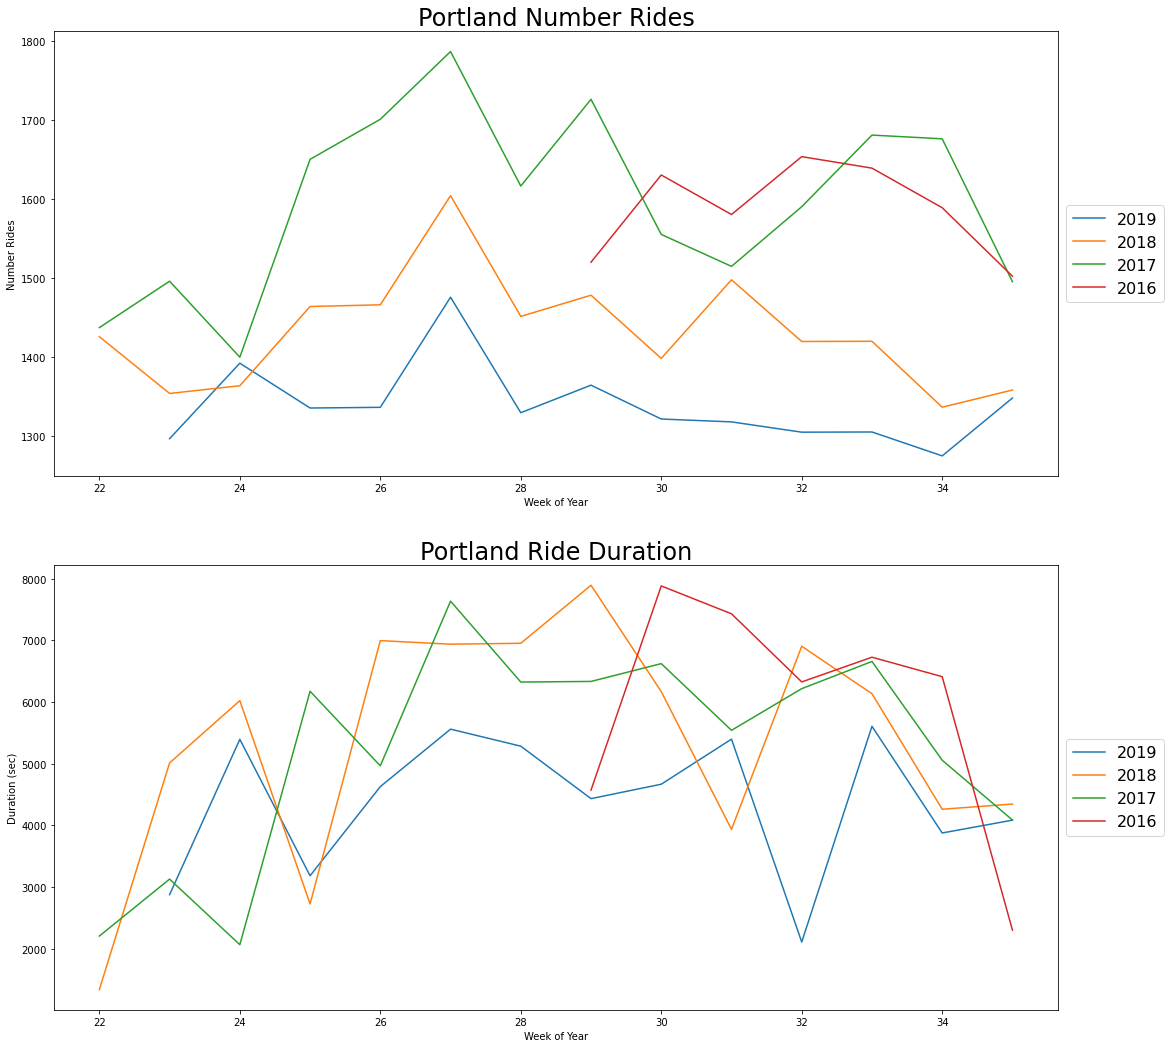

In [131]:
plotCityData(df_portland_Fianl)